# Exploratory Data Analysis (EDA) on Retail Sales Data


### Objective:

The objective of this project is to conduct an in-depth analysis of a retail company's sales dataset to derive actionable insights. By leveraging various analytical techniques such as data loading and cleaning, descriptive statistics, time series analysis, customer, and product analysis, along with visualization methods, the aim is to provide strategic recommendations that can enhance sales performance and customer satisfaction

### Problem Statement:

A retail company aims to enhance its sales performance by gaining a deeper understanding of its sales dataset. The dataset contains information about sales transactions, including customer demographics, product details, and sales figures over time. The company seeks to perform an Exploratory Data Analysis (EDA) to derive actionable insights that can inform strategic decisions. The analysis should cover data loading and cleaning, descriptive statistics, time series analysis to understand sales trends, customer and product analysis to identify patterns in demographics and purchasing behavior, and visualization to present findings effectively. The ultimate goal is to generate recommendations that can drive improvements in sales and customer satisfaction.

### 1.Data Loading and Cleaning: Load the retail sales dataset.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
retail_data = pd.read_csv('retail_sales_dataset.csv')

In [4]:
# Check for missing values
print("Missing values in each column:")
print(retail_data.isnull().sum())

Missing values in each column:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [5]:
# Drop any unnecessary columns or rows, if needed
# retail_data.drop(['column_name'], axis=1, inplace=True)

In [6]:
# Convert date column to datetime format
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

### 2.Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).

In [7]:
# Calculate basic statistics
print("Descriptive Statistics:")
print(retail_data.describe())

Descriptive Statistics:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


### 3.Time Series Analysis: Analyze sales trends over time using time series techniques.

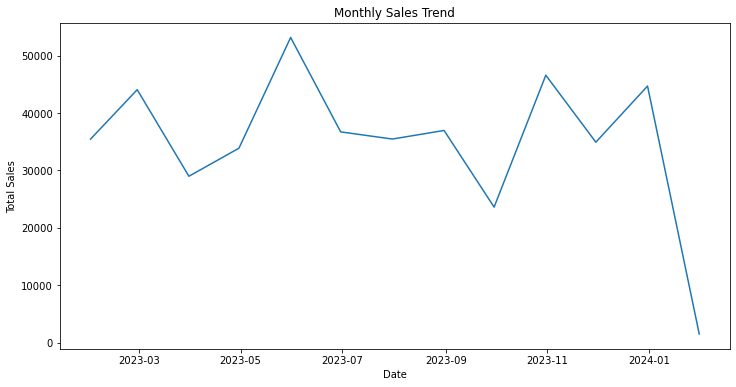

In [8]:
# Monthly sales trend
monthly_sales = retail_data.resample('M', on='Date')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

### 4.Customer and Product Analysis: Analyze customer demographics and purchasing behavior.

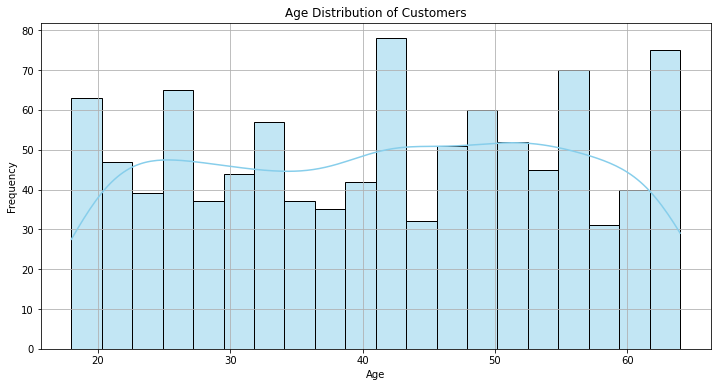

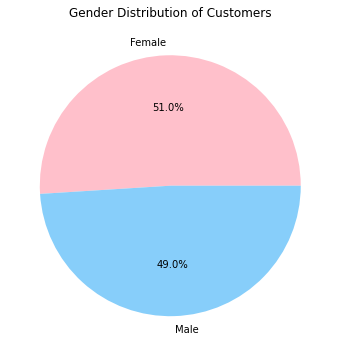

In [11]:
# Customer demographics analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=retail_data, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
retail_data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightskyblue'])
plt.title('Gender Distribution of Customers')
plt.ylabel('')
plt.show()


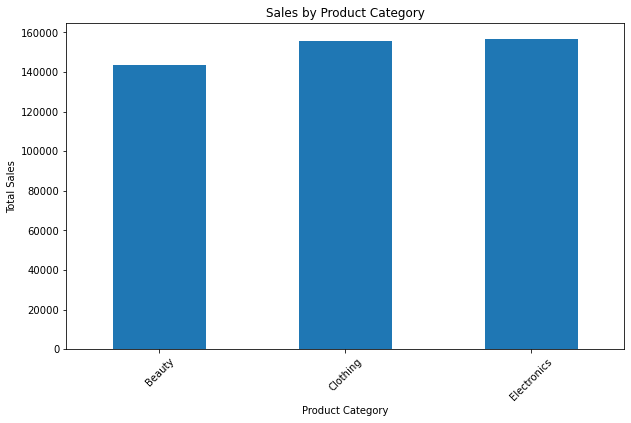

In [12]:
# Sales by product category
product_category_sales = retail_data.groupby('Product Category')['Total Amount'].sum()
plt.figure(figsize=(10, 6))
product_category_sales.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### 5.Visualization: Present insights through bar charts, line plots, and heatmaps.

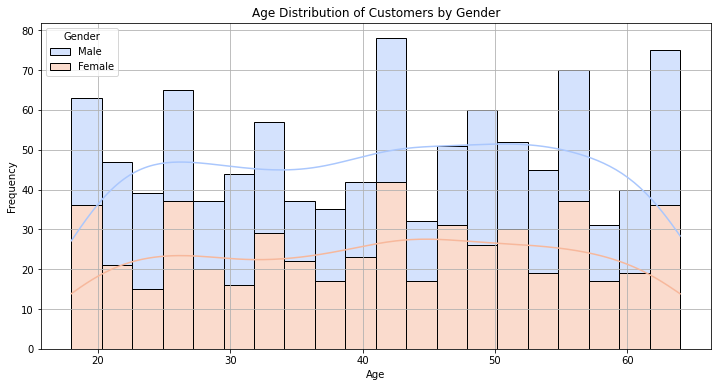

In [14]:
# Bar chart for age distribution by gender
plt.figure(figsize=(12, 6))
sns.histplot(data=retail_data, x='Age', hue='Gender', bins=20, kde=True, multiple='stack', palette='coolwarm')
plt.title('Age Distribution of Customers by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

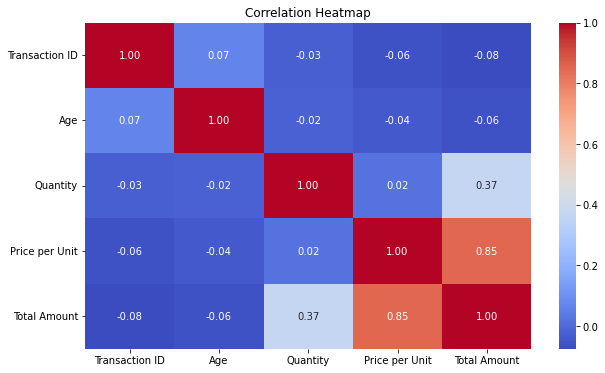

In [22]:
# Heatmap for correlation between numeric variables
numeric_columns = retail_data.select_dtypes(include=['number']).columns.tolist()
plt.figure(figsize=(10, 6))
sns.heatmap(retail_data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

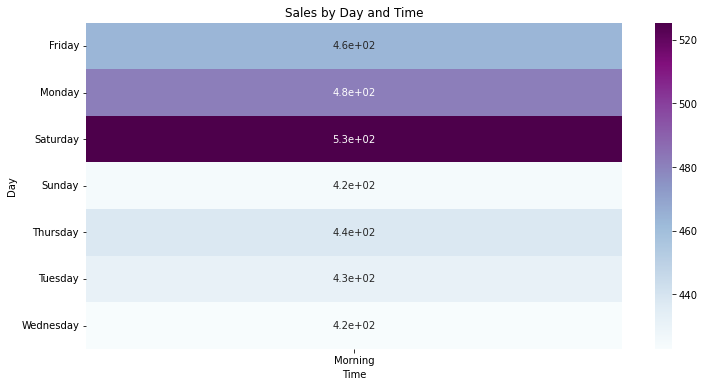

In [20]:
# Heatmap for sales by day of week and time of day
retail_data['Day'] = retail_data['Date'].dt.day_name()
retail_data['Time'] = retail_data['Date'].dt.hour.apply(lambda x: 'Morning' if x < 12 else 'Afternoon' if x < 18 else 'Evening')
pivot_table = retail_data.pivot_table(index='Day', columns='Time', values='Total Amount', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap="BuPu")
plt.title('Sales by Day and Time')
plt.show()